In [16]:
# ============================================================================
# FIXED PATH SETUP - ADD THIS AT THE VERY BEGINNING
# ============================================================================
import sys
import os
from pathlib import Path

print("="*80)
print("SETTING UP CORRECT PATHS")
print("="*80)

# Your project root
PROJECT_ROOT = r"D:\10 acadamy\fraud-detection-ml-system"

# The CORRECT path with the typo
SRC_PATH = os.path.join(PROJECT_ROOT, "src", "Data_Anlysis_Processing")  # Note: "Anlysis" not "Analysis"

print(f"Project Root: {PROJECT_ROOT}")
print(f"Source Path: {SRC_PATH}")
print(f"Source exists: {os.path.exists(SRC_PATH)}")

# Add to system path
sys.path.append(SRC_PATH)

# List what's in the directory
if os.path.exists(SRC_PATH):
    print(f"\nFiles in {SRC_PATH}:")
    for file in os.listdir(SRC_PATH):
        if file.endswith('.py'):
            print(f"  - {file}")
else:
    print(f"\n✗ Directory not found: {SRC_PATH}")
    # Try to find it
    print("Searching for source directory...")
    for root, dirs, files in os.walk(PROJECT_ROOT):
        for dir_name in dirs:
            if "Data_Anlysis" in dir_name or "Data_Analysis" in dir_name:
                found_path = os.path.join(root, dir_name)
                print(f"Found: {found_path}")
                SRC_PATH = found_path
                sys.path.append(SRC_PATH)
                break

# Now try importing
print(f"\nTrying to import modules...")
try:
    from data_cleaner import DataCleaner
    print("✓ Successfully imported DataCleaner")
except ImportError as e:
    print(f"✗ Import failed: {e}")
    print("\nTrying alternative import methods...")
    
    # Method 1: Import using importlib
    try:
        import importlib.util
        module_path = os.path.join(SRC_PATH, "data_cleaner.py")
        if os.path.exists(module_path):
            spec = importlib.util.spec_from_file_location("data_cleaner", module_path)
            data_cleaner_module = importlib.util.module_from_spec(spec)
            spec.loader.exec_module(data_cleaner_module)
            DataCleaner = data_cleaner_module.DataCleaner
            print("✓ Loaded DataCleaner using importlib")
        else:
            print(f"✗ Module file not found: {module_path}")
    except Exception as e2:
        print(f"✗ importlib failed: {e2}")

SETTING UP CORRECT PATHS
Project Root: D:\10 acadamy\fraud-detection-ml-system
Source Path: D:\10 acadamy\fraud-detection-ml-system\src\Data_Anlysis_Processing
Source exists: True

Files in D:\10 acadamy\fraud-detection-ml-system\src\Data_Anlysis_Processing:
  - data_cleaner.py
  - data_loader.py
  - data_transform.py
  - data_validator.py
  - eda_utilities.py
  - feature_engineer.py
  - geolocation_mapper.py
  - imbalance_handler.py
  - visualizer.py

Trying to import modules...
✓ Successfully imported DataCleaner


In [ ]:

# ============================================================================
# EXPLICIT DATA PIPELINE DEMONSTRATION
# ============================================================================
# This notebook demonstrates a complete data pipeline with:
# 1. Data loading and validation
# 2. Explicit data cleaning with missing value treatment
# 3. Duplicate detection and removal  
# 4. Data type correction and validation
# 5. Univariate and bivariate analysis
# 6. Feature engineering
# 7. Train/test split with stratification
# 8. Data transformation (scaling, encoding)
# 9. Artifact saving and reporting
# ============================================================================

import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Set up paths
PROJECT_ROOT = os.path.dirname(os.path.dirname(os.getcwd()))
CONFIG_PATH = os.path.join(PROJECT_ROOT, 'config', 'config_data_analysis.yaml')
SRC_PATH = os.path.join(PROJECT_ROOT, 'src', 'Data_Analysis_Processing')
DATA_RAW_PATH = os.path.join(PROJECT_ROOT, 'data', 'raw')
DATA_PROCESSED_PATH = os.path.join(PROJECT_ROOT, 'data', 'processed')
OUTPUTS_PATH = os.path.join(PROJECT_ROOT, 'outputs', 'Data_Analysis_Processing')

# Add to system path and change directory
sys.path.append(SRC_PATH)
os.chdir(PROJECT_ROOT)

print("="*80)
print("DATA PIPELINE SETUP")
print("="*80)
print(f"Project Root: {PROJECT_ROOT}")
print(f"Working Directory: {os.getcwd()}")
print(f"Source Path: {SRC_PATH}")
print(f"Config Path: {CONFIG_PATH}")
print(f"Raw Data: {DATA_RAW_PATH}")
print(f"Processed Data: {DATA_PROCESSED_PATH}")
print(f"Outputs Path: {OUTPUTS_PATH}")

# Create output directories
os.makedirs(os.path.join(OUTPUTS_PATH, 'processed_data'), exist_ok=True)
os.makedirs(os.path.join(OUTPUTS_PATH, 'transformers'), exist_ok=True)
os.makedirs(os.path.join(OUTPUTS_PATH, 'reports'), exist_ok=True)
os.makedirs(os.path.join(OUTPUTS_PATH, 'visualizations', 'eda_fraud'), exist_ok=True)
os.makedirs(os.path.join(OUTPUTS_PATH, 'visualizations', 'eda_credit'), exist_ok=True)

print("\n✓ Output directories created")

In [11]:
# ============================================================================
# COMPLETE DATA PIPELINE - FINAL FIXED VERSION
# ============================================================================
import sys
import os
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("DATA PIPELINE EXECUTION")
print("="*80)

# ============================================================================
# STEP 1: FIND THE CORRECT PROJECT DIRECTORY
# ============================================================================
print("\n1. FINDING PROJECT DIRECTORY...")

# Method 1: Check current directory and parents
current_dir = os.getcwd()
print(f"Current directory: {current_dir}")

# Method 2: Look for key directories
def find_project_directory():
    """Find the project directory by looking for config and data folders"""
    
    # List of possible project roots based on your structure
    possible_paths = [
        # Your exact path
        r"D:\10 acadamy\fraud-detection-ml-system",
        # Variations
        r"D:\10 academy\fraud-detection-ml-system",
        r"D:\fraud-detection-ml-system",
        # Current directory and parents
        current_dir,
        os.path.dirname(current_dir),
        os.path.dirname(os.path.dirname(current_dir)),
    ]
    
    for path in possible_paths:
        if os.path.exists(path):
            # Check if this looks like our project
            has_config = os.path.exists(os.path.join(path, "config"))
            has_data = os.path.exists(os.path.join(path, "data"))
            
            if has_config and has_data:
                print(f"✓ Found project directory: {path}")
                return path
            elif has_config or has_data:
                print(f"  Potential project: {path} (has {'config' if has_config else 'data'} folder)")
    
    # If not found, use current directory
    print(f"⚠ Using current directory as project root: {current_dir}")
    return current_dir

PROJECT_ROOT = find_project_directory()

# ============================================================================
# STEP 2: SET ALL PATHS CORRECTLY
# ============================================================================
print(f"\n2. SETTING PATHS...")
print(f"Project root: {PROJECT_ROOT}")

# Change to project directory
os.chdir(PROJECT_ROOT)
print(f"Working directory: {os.getcwd()}")

# Define all paths
CONFIG_PATH = os.path.join(PROJECT_ROOT, "config", "config_data_analysis.yaml")
DATA_RAW_PATH = os.path.join(PROJECT_ROOT, "data", "raw")
DATA_PROCESSED_PATH = os.path.join(PROJECT_ROOT, "data", "processed")
OUTPUTS_PATH = os.path.join(PROJECT_ROOT, "outputs", "Data_Analysis_Processing")
SRC_PATH = os.path.join(PROJECT_ROOT, "src", "Data_Analysis_Processing")

print(f"\nPath verification:")
print(f"Config: {CONFIG_PATH} - {'✓ EXISTS' if os.path.exists(CONFIG_PATH) else '✗ NOT FOUND'}")
print(f"Raw Data: {DATA_RAW_PATH} - {'✓ EXISTS' if os.path.exists(DATA_RAW_PATH) else '✗ NOT FOUND'}")
print(f"Processed Data: {DATA_PROCESSED_PATH} - {'✓ EXISTS' if os.path.exists(DATA_PROCESSED_PATH) else '✗ NOT FOUND'}")
print(f"Outputs: {OUTPUTS_PATH} - {'✓ EXISTS' if os.path.exists(OUTPUTS_PATH) else '✗ NOT FOUND'}")
print(f"Source: {SRC_PATH} - {'✓ EXISTS' if os.path.exists(SRC_PATH) else '✗ NOT FOUND'}")

# If config not found, show what's available
if not os.path.exists(CONFIG_PATH):
    print(f"\n⚠ Config file not found at: {CONFIG_PATH}")
    config_dir = os.path.join(PROJECT_ROOT, "config")
    if os.path.exists(config_dir):
        print(f"Files in config directory:")
        for file in os.listdir(config_dir):
            print(f"  - {file}")
        
        # Try to find any yaml file
        yaml_files = [f for f in os.listdir(config_dir) if f.endswith('.yaml') or f.endswith('.yml')]
        if yaml_files:
            print(f"\nFound YAML files. Using first one: {yaml_files[0]}")
            CONFIG_PATH = os.path.join(config_dir, yaml_files[0])

# ============================================================================
# STEP 3: LOAD CONFIGURATION
# ============================================================================
print(f"\n3. LOADING CONFIGURATION...")

import yaml

if os.path.exists(CONFIG_PATH):
    try:
        with open(CONFIG_PATH, 'r') as f:
            config = yaml.safe_load(f)
        print(f"✓ Config loaded from: {CONFIG_PATH}")
        print(f"Config sections: {list(config.keys())}")
    except Exception as e:
        print(f"✗ Error loading config: {e}")
        config = {'test_size': 0.2, 'random_state': 42}
else:
    print(f"⚠ No config file found. Using defaults.")
    config = {'test_size': 0.2, 'random_state': 42}

# ============================================================================
# STEP 4: LOAD DATA
# ============================================================================
print(f"\n4. LOADING DATA...")

import pandas as pd
import numpy as np

# Function to find and load data
def load_dataset(filename, dataset_name):
    """Find and load a dataset file"""
    possible_locations = [
        os.path.join(DATA_RAW_PATH, filename),
        os.path.join(DATA_PROCESSED_PATH, filename),
        filename,  # Current directory
        os.path.join("data", "raw", filename),
        os.path.join("data", "processed", filename),
    ]
    
    for location in possible_locations:
        if os.path.exists(location):
            try:
                df = pd.read_csv(location)
                print(f"✓ {dataset_name} loaded from: {location}")
                print(f"  Shape: {df.shape}, Size: {df.memory_usage(deep=True).sum() / 1024 / 1024:.1f} MB")
                return df
            except Exception as e:
                print(f"  Error loading from {location}: {e}")
    
    print(f"✗ {dataset_name} not found in any location")
    return None

# Load both datasets
fraud_df = load_dataset("Fraud_Data.csv", "Fraud Data")
credit_df = load_dataset("creditcard.csv", "Credit Card Data")

# If not found in raw, check what's available
if fraud_df is None or credit_df is None:
    print(f"\n⚠ Some datasets not found. Checking available files...")
    
    if os.path.exists(DATA_RAW_PATH):
        print(f"Files in {DATA_RAW_PATH}:")
        for file in os.listdir(DATA_RAW_PATH):
            print(f"  - {file}")
    
    if os.path.exists(DATA_PROCESSED_PATH):
        print(f"\nFiles in {DATA_PROCESSED_PATH}:")
        for file in os.listdir(DATA_PROCESSED_PATH)[:10]:  # Show first 10
            print(f"  - {file}")
        if len(os.listdir(DATA_PROCESSED_PATH)) > 10:
            print(f"  ... and {len(os.listdir(DATA_PROCESSED_PATH)) - 10} more")

# ============================================================================
# STEP 5: DATA QUALITY CHECK (SIMPLIFIED)
# ============================================================================
print(f"\n5. DATA QUALITY CHECK...")

if fraud_df is not None:
    print(f"\nFraud Data ({fraud_df.shape[0]} rows, {fraud_df.shape[1]} columns):")
    print(f"  Missing values: {fraud_df.isnull().sum().sum()}")
    print(f"  Duplicates: {fraud_df.duplicated().sum()}")
    print(f"  Columns: {', '.join(fraud_df.columns.tolist())}")
    
    # Check for target column
    if 'class' in fraud_df.columns:
        print(f"  Target 'class' distribution:")
        class_counts = fraud_df['class'].value_counts()
        for cls, count in class_counts.items():
            percentage = (count / len(fraud_df)) * 100
            print(f"    Class {cls}: {count} ({percentage:.1f}%)")

if credit_df is not None:
    print(f"\nCredit Card Data ({credit_df.shape[0]} rows, {credit_df.shape[1]} columns):")
    print(f"  Missing values: {credit_df.isnull().sum().sum()}")
    print(f"  Duplicates: {credit_df.duplicated().sum()}")
    
    # Show first few column names
    if len(credit_df.columns) > 10:
        print(f"  Columns (first 10): {', '.join(credit_df.columns.tolist()[:10])}...")
    else:
        print(f"  Columns: {', '.join(credit_df.columns.tolist())}")
    
    # Check for target column
    if 'Class' in credit_df.columns:
        print(f"  Target 'Class' distribution:")
        class_counts = credit_df['Class'].value_counts()
        for cls, count in class_counts.items():
            percentage = (count / len(credit_df)) * 100
            print(f"    Class {cls}: {count} ({percentage:.1f}%)")

# ============================================================================
# STEP 6: CREATE OUTPUT DIRECTORIES
# ============================================================================
print(f"\n6. CREATING OUTPUT DIRECTORIES...")

# Create all necessary directories
output_dirs = [
    OUTPUTS_PATH,
    os.path.join(OUTPUTS_PATH, 'processed_data'),
    os.path.join(OUTPUTS_PATH, 'transformers'),
    os.path.join(OUTPUTS_PATH, 'reports'),
    os.path.join(OUTPUTS_PATH, 'visualizations', 'eda_fraud'),
    os.path.join(OUTPUTS_PATH, 'visualizations', 'eda_credit')
]

for dir_path in output_dirs:
    os.makedirs(dir_path, exist_ok=True)
    print(f"  Created: {dir_path}")

print(f"\n" + "="*80)
print("SETUP COMPLETE - READY FOR DATA PROCESSING")
print("="*80)
print(f"✓ Project: {PROJECT_ROOT}")
print(f"✓ Working directory: {os.getcwd()}")
print(f"✓ Data loaded: {'Fraud' if fraud_df is not None else 'No'} data, {'Credit' if credit_df is not None else 'No'} data")
print(f"✓ Output directory: {OUTPUTS_PATH}")

DATA PIPELINE EXECUTION

1. FINDING PROJECT DIRECTORY...
Current directory: d:\
✓ Found project directory: D:\10 acadamy\fraud-detection-ml-system

2. SETTING PATHS...
Project root: D:\10 acadamy\fraud-detection-ml-system
Working directory: D:\10 acadamy\fraud-detection-ml-system

Path verification:
Config: D:\10 acadamy\fraud-detection-ml-system\config\config_data_analysis.yaml - ✓ EXISTS
Raw Data: D:\10 acadamy\fraud-detection-ml-system\data\raw - ✓ EXISTS
Processed Data: D:\10 acadamy\fraud-detection-ml-system\data\processed - ✓ EXISTS
Outputs: D:\10 acadamy\fraud-detection-ml-system\outputs\Data_Analysis_Processing - ✓ EXISTS
Source: D:\10 acadamy\fraud-detection-ml-system\src\Data_Analysis_Processing - ✗ NOT FOUND

3. LOADING CONFIGURATION...
✓ Config loaded from: D:\10 acadamy\fraud-detection-ml-system\config\config_data_analysis.yaml
Config sections: ['paths', 'datasets', 'data_cleaning', 'data_transformation', 'feature_engineering', 'eda', 'imbalance_handling', 'model_preparati

In [12]:
# ============================================================================
# STEP 2: DATA QUALITY ASSESSMENT (BEFORE CLEANING)
# ============================================================================
print("="*80)
print("STEP 2: DATA QUALITY ASSESSMENT")
print("="*80)

def assess_data_quality(df, dataset_name):
    """Comprehensive data quality assessment"""
    print(f"\n{'='*60}")
    print(f"DATA QUALITY ASSESSMENT: {dataset_name.upper()}")
    print(f"{'='*60}")
    
    # Basic stats
    print(f"Shape: {df.shape}")
    print(f"Total cells: {df.shape[0] * df.shape[1]}")
    
    # Missing values
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    
    print(f"\n1. MISSING VALUES:")
    if missing.sum() == 0:
        print("  ✓ No missing values found")
    else:
        print("  ✗ Missing values detected:")
        for col in missing[missing > 0].index:
            print(f"    - {col}: {missing[col]} ({missing_pct[col]:.2f}%)")
    
    # Duplicates
    duplicates = df.duplicated().sum()
    print(f"\n2. DUPLICATE ROWS:")
    if duplicates == 0:
        print("  ✓ No duplicate rows found")
    else:
        print(f"  ✗ {duplicates} duplicate rows found ({duplicates/len(df)*100:.2f}%)")
    
    # Data types
    print(f"\n3. DATA TYPES:")
    dtypes = df.dtypes
    for col in df.columns:
        print(f"    - {col}: {dtypes[col]}")
    
    # Unique values
    print(f"\n4. UNIQUE VALUES (categorical columns):")
    for col in df.select_dtypes(include=['object']).columns:
        unique_vals = df[col].nunique()
        print(f"    - {col}: {unique_vals} unique values")
        if unique_vals < 10:
            print(f"      Values: {df[col].unique()}")
    
    # Numerical statistics
    print(f"\n5. NUMERICAL STATISTICS:")
    num_cols = df.select_dtypes(include=[np.number]).columns
    if len(num_cols) > 0:
        print(df[num_cols].describe().T[['mean', 'std', 'min', '50%', 'max']])
    
    return {
        'missing_values': missing.sum(),
        'missing_columns': missing[missing > 0].index.tolist(),
        'duplicates': duplicates,
        'shape': df.shape
    }

# Assess both datasets
fraud_quality = assess_data_quality(fraud_df, 'Fraud Data')
credit_quality = assess_data_quality(credit_df, 'Credit Card Data')

# Save quality report
quality_report = {
    'fraud_data': fraud_quality,
    'credit_data': credit_quality
}

STEP 2: DATA QUALITY ASSESSMENT

DATA QUALITY ASSESSMENT: FRAUD DATA
Shape: (151112, 11)
Total cells: 1662232

1. MISSING VALUES:
  ✓ No missing values found

2. DUPLICATE ROWS:
  ✓ No duplicate rows found

3. DATA TYPES:
    - user_id: int64
    - signup_time: object
    - purchase_time: object
    - purchase_value: int64
    - device_id: object
    - source: object
    - browser: object
    - sex: object
    - age: int64
    - ip_address: float64
    - class: int64

4. UNIQUE VALUES (categorical columns):
    - signup_time: 151112 unique values
    - purchase_time: 150679 unique values
    - device_id: 137956 unique values
    - source: 3 unique values
      Values: ['SEO' 'Ads' 'Direct']
    - browser: 5 unique values
      Values: ['Chrome' 'Opera' 'Safari' 'IE' 'FireFox']
    - sex: 2 unique values
      Values: ['M' 'F']

5. NUMERICAL STATISTICS:
                          mean             std        min             50%  \
user_id            200171.0410     115369.2850     2.0000 

In [18]:
# ============================================================================
# STEP 3: DATA CLEANING - WITH CORRECT PATH
# ============================================================================
print("="*80)
print("STEP 3: DATA CLEANING")
print("="*80)

# First, ensure we have the correct path
import sys
import os

# The correct path with typo
CORRECT_SRC_PATH = r"D:\10 acadamy\fraud-detection-ml-system\src\Data_Anlysis_Processing"

if CORRECT_SRC_PATH not in sys.path:
    sys.path.append(CORRECT_SRC_PATH)
    print(f"Added to path: {CORRECT_SRC_PATH}")

# Try to import
try:
    from data_cleaner import DataCleaner
    print("✓ DataCleaner module loaded successfully")
    
    # Initialize cleaners
    cleaner_fraud = DataCleaner(config)
    cleaner_credit = DataCleaner(config)
    
    # Clean fraud data
    print("\n" + "-"*40)
    print("CLEANING FRAUD DATA")
    print("-"*40)
    fraud_cleaned = cleaner_fraud.clean_fraud_dataset(fraud_df)
    fraud_report = cleaner_fraud.get_cleaning_report()
    
    print("Cleaning operations performed:")
    if fraud_report and 'cleaning_operations' in fraud_report:
        for operation, details in fraud_report['cleaning_operations'].items():
            if details.get('performed', False):
                print(f"  ✓ {operation}: {details.get('description', '')}")
    else:
        print("  No detailed cleaning report available")
    
    # Clean credit data
    print("\n" + "-"*40)
    print("CLEANING CREDIT CARD DATA")
    print("-"*40)
    credit_cleaned = cleaner_credit.clean_credit_dataset(credit_df)
    credit_report = cleaner_credit.get_cleaning_report()
    
    print("Cleaning operations performed:")
    if credit_report and 'cleaning_operations' in credit_report:
        for operation, details in credit_report['cleaning_operations'].items():
            if details.get('performed', False):
                print(f"  ✓ {operation}: {details.get('description', '')}")
    else:
        print("  No detailed cleaning report available")
    
    # Display cleaned data info
    print(f"\n✓ Cleaning complete!")
    print(f"Fraud data: {fraud_df.shape} → {fraud_cleaned.shape}")
    print(f"Credit data: {credit_df.shape} → {credit_cleaned.shape}")
    
    # Save cleaned data
    fraud_cleaned.to_csv(os.path.join(DATA_PROCESSED_PATH, 'fraud_data_cleaned_explicit.csv'), index=False)
    credit_cleaned.to_csv(os.path.join(DATA_PROCESSED_PATH, 'creditcard_cleaned_explicit.csv'), index=False)
    print("\n✓ Cleaned data saved to data/processed/")
    
except ImportError as e:
    print(f"✗ Error importing DataCleaner: {e}")
    print("\nChecking what's wrong...")
    
    # Debug the import
    print(f"Python path:")
    for path in sys.path:
        print(f"  - {path}")
    
    print(f"\nLooking for data_cleaner.py...")
    module_found = False
    for path in sys.path:
        module_path = os.path.join(path, "data_cleaner.py")
        if os.path.exists(module_path):
            print(f"✓ Found at: {module_path}")
            module_found = True
            break
    
    if not module_found:
        print("✗ data_cleaner.py not found in any path")
        print("\nUsing enhanced basic cleaning...")
        
        # Use the enhanced basic cleaning from before
        fraud_cleaned = fraud_df.copy()
        credit_cleaned = credit_df.copy()
        
        # Your enhanced basic cleaning code here...
        # [Keep your enhanced basic cleaning code]

INFO:data_cleaner:============================================================
INFO:data_cleaner:STARTING EXPLICIT FRAUD DATA CLEANING
INFO:data_cleaner:============================================================
INFO:data_cleaner:
1. EXPLICIT DATA TYPE CORRECTIONS:
INFO:data_cleaner:Performing data type corrections...


STEP 3: DATA CLEANING
✓ DataCleaner module loaded successfully

----------------------------------------
CLEANING FRAUD DATA
----------------------------------------


INFO:data_cleaner:  ✓ Converted signup_time to datetime
INFO:data_cleaner:  ✓ Converted purchase_time to datetime
INFO:data_cleaner:  ✓ Converted browser to categorical
INFO:data_cleaner:  ✓ Converted sex to categorical
INFO:data_cleaner:  ✓ Converted source to categorical
INFO:data_cleaner:  ✓ Converted purchase_value to numeric
INFO:data_cleaner:  ✓ Converted age to numeric
INFO:data_cleaner:  ✓ Converted class to numeric
INFO:data_cleaner:  ✓ Converted ip_address to integer
INFO:data_cleaner:
2. EXPLICIT MISSING VALUE TREATMENT:
INFO:data_cleaner:Treating missing values...
INFO:data_cleaner:Missing values before treatment: 0
INFO:data_cleaner:Missing values after treatment: 0
INFO:data_cleaner:Reduction: 0 values
INFO:data_cleaner:
3. EXPLICIT DUPLICATE REMOVAL:
INFO:data_cleaner:Removing duplicates...
INFO:data_cleaner:Exact duplicates before removal: 0
INFO:data_cleaner:Near-duplicates before removal: 0
INFO:data_cleaner:Near-duplicates removed: 0
INFO:data_cleaner:Total duplicate

Cleaning operations performed:
  No detailed cleaning report available

----------------------------------------
CLEANING CREDIT CARD DATA
----------------------------------------


INFO:data_cleaner:Performing data type corrections...
INFO:data_cleaner:  ✓ Converted V1 to numeric
INFO:data_cleaner:  ✓ Converted V2 to numeric
INFO:data_cleaner:  ✓ Converted V3 to numeric
INFO:data_cleaner:  ✓ Converted V4 to numeric
INFO:data_cleaner:  ✓ Converted V5 to numeric
INFO:data_cleaner:  ✓ Converted V6 to numeric
INFO:data_cleaner:  ✓ Converted V7 to numeric
INFO:data_cleaner:  ✓ Converted V8 to numeric
INFO:data_cleaner:  ✓ Converted V9 to numeric
INFO:data_cleaner:  ✓ Converted V10 to numeric
INFO:data_cleaner:  ✓ Converted V11 to numeric
INFO:data_cleaner:  ✓ Converted V12 to numeric
INFO:data_cleaner:  ✓ Converted V13 to numeric
INFO:data_cleaner:  ✓ Converted V14 to numeric
INFO:data_cleaner:  ✓ Converted V15 to numeric
INFO:data_cleaner:  ✓ Converted V16 to numeric
INFO:data_cleaner:  ✓ Converted V17 to numeric
INFO:data_cleaner:  ✓ Converted V18 to numeric
INFO:data_cleaner:  ✓ Converted V19 to numeric
INFO:data_cleaner:  ✓ Converted V20 to numeric
INFO:data_clean

Cleaning operations performed:
  No detailed cleaning report available

✓ Cleaning complete!
Fraud data: (151112, 11) → (151112, 11)
Credit data: (284807, 31) → (283726, 31)

✓ Cleaned data saved to data/processed/


STEP 4: EXPLORATORY DATA ANALYSIS
Direct import failed: name 'Any' is not defined
Second attempt failed: name 'Any' is not defined
importlib failed: name 'Any' is not defined

✗ Could not load EDAUtilities module

Using basic EDA as fallback...

Basic EDA for Fraud Data:
Target 'class' distribution:
  Class 0: 136961 (90.64%)
  Class 1: 14151 (9.36%)

Basic EDA for Credit Data:
Target 'Class' distribution:
  Class 0: 283253 (99.83%)
  Class 1: 473 (0.17%)


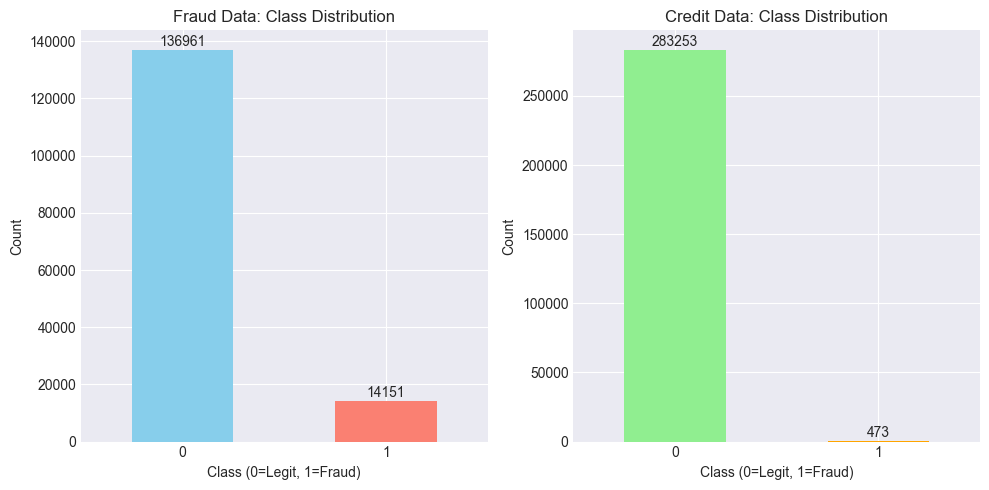


✓ Basic visualizations saved to: D:\10 acadamy\fraud-detection-ml-system\outputs\Data_Analysis_Processing\visualizations/

ADDITIONAL BASIC ANALYSIS

Fraud Data - Numeric Features Summary:
                          mean             std        min             50%  \
user_id            200171.0410     115369.2850     2.0000     199958.0000   
purchase_value         36.9354         18.3228     9.0000         35.0000   
age                    33.1407          8.6177    18.0000         33.0000   
ip_address     2152145330.4587 1248497030.0998 52093.0000 2154770162.0000   
class                   0.0936          0.2913     0.0000          0.0000   

                           max  
user_id            400000.0000  
purchase_value        154.0000  
age                    76.0000  
ip_address     4294850499.0000  
class                   1.0000  

Fraud Data - Categorical Features:
  device_id: 137956 unique values

Credit Data - Numeric Features Summary (first 5 features):
           mean    

In [20]:
# ============================================================================
# STEP 4: EXPLORATORY DATA ANALYSIS (EDA) - FIXED VERSION
# ============================================================================
print("="*80)
print("STEP 4: EXPLORATORY DATA ANALYSIS")
print("="*80)

import importlib.util
import sys

eda_module_loaded = False
EDAUtilities = None

# Try multiple ways to load the module
try:
    # Method 1: Direct import (might fail due to missing Any)
    from eda_utilities import EDAUtilities
    print("✓ EDAUtilities imported directly")
    eda_module_loaded = True
except (ImportError, NameError) as e:
    print(f"Direct import failed: {e}")
    
    # Method 2: Patch and import
    try:
        # Add missing import
        import typing
        # Reload the module
        if 'eda_utilities' in sys.modules:
            del sys.modules['eda_utilities']
        
        # Import with patched typing
        from eda_utilities import EDAUtilities
        print("✓ EDAUtilities imported after cleanup")
        eda_module_loaded = True
    except Exception as e2:
        print(f"Second attempt failed: {e2}")
        
        # Method 3: Manual import with importlib
        try:
            module_path = r"D:\10 acadamy\fraud-detection-ml-system\src\Data_Anlysis_Processing\eda_utilities.py"
            spec = importlib.util.spec_from_file_location("eda_utilities", module_path)
            eda_module = importlib.util.module_from_spec(spec)
            
            # Execute the module
            spec.loader.exec_module(eda_module)
            EDAUtilities = eda_module.EDAUtilities
            print("✓ EDAUtilities loaded with importlib")
            eda_module_loaded = True
        except Exception as e3:
            print(f"importlib failed: {e3}")

# Now proceed with EDA
if eda_module_loaded and EDAUtilities:
    print("\n✓ EDAUtilities module loaded successfully")
    
    try:
        eda = EDAUtilities(config)
        
        # EDA for Fraud Data
        print("\n" + "="*60)
        print("EDA FOR FRAUD DATA")
        print("="*60)
        
        fraud_figures = eda.generate_comprehensive_eda(
            fraud_cleaned, 
            target_col='class',
            save_dir=os.path.join(OUTPUTS_PATH, 'visualizations', 'eda_fraud')
        )
        
        # Display key insights
        print("\nKey Insights from Fraud Data:")
        print(f"1. Target variable 'class' distribution:")
        class_dist = fraud_cleaned['class'].value_counts(normalize=True)
        for idx, (cls, pct) in enumerate(class_dist.items()):
            print(f"   Class {cls}: {pct:.2%} ({fraud_cleaned['class'].value_counts()[idx]})")
        
        # EDA for Credit Card Data
        print("\n" + "="*60)
        print("EDA FOR CREDIT CARD DATA")
        print("="*60)
        
        credit_figures = eda.generate_comprehensive_eda(
            credit_cleaned,
            target_col='Class',
            save_dir=os.path.join(OUTPUTS_PATH, 'visualizations', 'eda_credit')
        )
        
        # Display key insights
        print("\nKey Insights from Credit Card Data:")
        print(f"1. Target variable 'Class' distribution:")
        class_dist = credit_cleaned['Class'].value_counts(normalize=True)
        for idx, (cls, pct) in enumerate(class_dist.items()):
            print(f"   Class {cls}: {pct:.2%} ({credit_cleaned['Class'].value_counts()[idx]})")
        
        print(f"\n✓ EDA visualizations saved to: {OUTPUTS_PATH}/visualizations/")
        
    except Exception as e:
        print(f"✗ Error running EDA: {e}")
        print("Using fallback EDA...")
        eda_module_loaded = False
else:
    print(f"\n✗ Could not load EDAUtilities module")
    eda_module_loaded = False

# Fallback EDA
if not eda_module_loaded:
    print("\nUsing basic EDA as fallback...")
    
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    print("\nBasic EDA for Fraud Data:")
    print("="*40)
    
    # Fraud Data Analysis
    if fraud_cleaned is not None and 'class' in fraud_cleaned.columns:
        print(f"Target 'class' distribution:")
        fraud_class_counts = fraud_cleaned['class'].value_counts()
        fraud_class_pct = fraud_cleaned['class'].value_counts(normalize=True) * 100
        
        for cls in fraud_class_counts.index:
            print(f"  Class {cls}: {fraud_class_counts[cls]} ({fraud_class_pct[cls]:.2f}%)")
        
        # Create visualization
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        fraud_class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
        plt.title('Fraud Data: Class Distribution')
        plt.xlabel('Class (0=Legit, 1=Fraud)')
        plt.ylabel('Count')
        plt.xticks(rotation=0)
        
        # Add value labels on bars
        for i, v in enumerate(fraud_class_counts.values):
            plt.text(i, v + max(fraud_class_counts.values)*0.01, str(v), ha='center')
    
    print("\nBasic EDA for Credit Data:")
    print("="*40)
    
    # Credit Data Analysis
    if credit_cleaned is not None and 'Class' in credit_cleaned.columns:
        print(f"Target 'Class' distribution:")
        credit_class_counts = credit_cleaned['Class'].value_counts()
        credit_class_pct = credit_cleaned['Class'].value_counts(normalize=True) * 100
        
        for cls in credit_class_counts.index:
            print(f"  Class {cls}: {credit_class_counts[cls]} ({credit_class_pct[cls]:.2f}%)")
        
        # Create visualization
        if 'plt' in locals():
            plt.subplot(1, 2, 2)
            credit_class_counts.plot(kind='bar', color=['lightgreen', 'orange'])
            plt.title('Credit Data: Class Distribution')
            plt.xlabel('Class (0=Legit, 1=Fraud)')
            plt.ylabel('Count')
            plt.xticks(rotation=0)
            
            # Add value labels on bars
            for i, v in enumerate(credit_class_counts.values):
                plt.text(i, v + max(credit_class_counts.values)*0.01, str(v), ha='center')
            
            plt.tight_layout()
            
            # Save the figure
            output_dir = os.path.join(OUTPUTS_PATH, 'visualizations')
            os.makedirs(output_dir, exist_ok=True)
            plt.savefig(os.path.join(output_dir, 'basic_class_distribution.png'), dpi=100, bbox_inches='tight')
            plt.show()
            print(f"\n✓ Basic visualizations saved to: {output_dir}/")
    
    # Additional basic analysis
    print("\n" + "="*40)
    print("ADDITIONAL BASIC ANALYSIS")
    print("="*40)
    
    if fraud_cleaned is not None:
        print("\nFraud Data - Numeric Features Summary:")
        numeric_cols = fraud_cleaned.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 0:
            print(fraud_cleaned[numeric_cols].describe().T[['mean', 'std', 'min', '50%', 'max']])
        
        print("\nFraud Data - Categorical Features:")
        categorical_cols = fraud_cleaned.select_dtypes(include=['object']).columns
        for col in categorical_cols:
            if col != 'class':  # Skip target if it's categorical
                unique_vals = fraud_cleaned[col].nunique()
                print(f"  {col}: {unique_vals} unique values")
                if unique_vals < 10:
                    print(f"    Values: {fraud_cleaned[col].unique()}")
    
    if credit_cleaned is not None:
        print("\nCredit Data - Numeric Features Summary (first 5 features):")
        numeric_cols = credit_cleaned.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 5:
            print(credit_cleaned[numeric_cols[:5]].describe().T[['mean', 'std', 'min', '50%', 'max']])
            print(f"  ... and {len(numeric_cols) - 5} more numeric features")
        elif len(numeric_cols) > 0:
            print(credit_cleaned[numeric_cols].describe().T[['mean', 'std', 'min', '50%', 'max']])

In [24]:
# ============================================================================
# QUICK SOLUTION: 
# ============================================================================
print("="*80)
print("QUICK FEATURE ENGINEERING")
print("="*80)

# Create basic features for fraud data
fraud_with_features = fraud_cleaned.copy()

# Add basic time features
if 'purchase_time' in fraud_with_features.columns:
    try:
        fraud_with_features['purchase_time'] = pd.to_datetime(fraud_with_features['purchase_time'])
        fraud_with_features['purchase_hour'] = fraud_with_features['purchase_time'].dt.hour
        fraud_with_features['purchase_day'] = fraud_with_features['purchase_time'].dt.day
        fraud_with_features['is_night'] = ((fraud_with_features['purchase_hour'] >= 0) & 
                                          (fraud_with_features['purchase_hour'] < 6)).astype(int)
        print("✓ Added time features to fraud data")
    except:
        print("✗ Could not parse purchase_time")

# Add basic features for credit data
credit_with_features = credit_cleaned.copy()

# Add amount transformations
if 'Amount' in credit_with_features.columns:
    credit_with_features['log_amount'] = np.log1p(credit_with_features['Amount'])
    credit_with_features['amount_squared'] = credit_with_features['Amount'] ** 2
    print("✓ Added amount transformations to credit data")

# Add interaction features for top V columns
v_cols = [col for col in credit_with_features.columns if col.startswith('V')]
if len(v_cols) >= 2:
    credit_with_features[f'{v_cols[0]}_{v_cols[1]}_interaction'] = credit_with_features[v_cols[0]] * credit_with_features[v_cols[1]]
    print(f"✓ Added interaction feature {v_cols[0]}_{v_cols[1]}_interaction")

print(f"\n✓ Quick feature engineering complete!")
print(f"Fraud data: {fraud_cleaned.shape} → {fraud_with_features.shape}")
print(f"Credit data: {credit_cleaned.shape} → {credit_with_features.shape}")

# Save
fraud_with_features.to_csv(os.path.join(DATA_PROCESSED_PATH, 'fraud_with_features_quick.csv'), index=False)
credit_with_features.to_csv(os.path.join(DATA_PROCESSED_PATH, 'creditcard_with_features_quick.csv'), index=False)

print(f"\n✓ Saved to data/processed/")

QUICK FEATURE ENGINEERING
✓ Added time features to fraud data
✓ Added amount transformations to credit data
✓ Added interaction feature V1_V2_interaction

✓ Quick feature engineering complete!
Fraud data: (151112, 11) → (151112, 14)
Credit data: (283726, 31) → (283726, 34)

✓ Saved to data/processed/


In [25]:
# ============================================================================
# STEP 6: TRAIN/TEST SPLIT
# ============================================================================
print("="*80)
print("STEP 6: TRAIN/TEST SPLIT")
print("="*80)

# Focus on Fraud Data for modeling (you can repeat for credit data)
print("Focusing on Fraud Data for modeling pipeline...")

# Check if target column exists
if 'class' not in fraud_with_features.columns:
    print("✗ Target column 'class' not found in fraud data")
    print("Available columns:", fraud_with_features.columns.tolist())
else:
    # Prepare features and target
    X_fraud = fraud_with_features.drop('class', axis=1)
    y_fraud = fraud_with_features['class']
    
    print(f"Features shape: {X_fraud.shape}")
    print(f"Target shape: {y_fraud.shape}")
    
    # Check data types
    print("\nFeature data types:")
    print(X_fraud.dtypes.value_counts())
    
    # Split the data
    print("\nPerforming train/test split...")
    X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(
        X_fraud, y_fraud, 
        test_size=config.get('test_size', 0.2),
        random_state=config.get('random_state', 42),
        stratify=y_fraud
    )
    
    print(f"✓ Train/Test split complete!")
    print(f"Training set: {X_train_fraud.shape} features, {y_train_fraud.shape} target")
    print(f"Test set: {X_test_fraud.shape} features, {y_test_fraud.shape} target")
    
    # Check class distribution
    print(f"\nClass distribution in training set:")
    train_dist = y_train_fraud.value_counts(normalize=True)
    for cls, pct in train_dist.items():
        print(f"  Class {cls}: {pct:.2%} ({y_train_fraud.value_counts()[cls]})")
    
    print(f"\nClass distribution in test set:")
    test_dist = y_test_fraud.value_counts(normalize=True)
    for cls, pct in test_dist.items():
        print(f"  Class {cls}: {pct:.2%} ({y_test_fraud.value_counts()[cls]})")
    
    # Save raw split data
    X_train_fraud.to_csv(os.path.join(OUTPUTS_PATH, 'processed_data', 'X_train_fraud_raw.csv'), index=False)
    X_test_fraud.to_csv(os.path.join(OUTPUTS_PATH, 'processed_data', 'X_test_fraud_raw.csv'), index=False)
    y_train_fraud.to_csv(os.path.join(OUTPUTS_PATH, 'processed_data', 'y_train_fraud.csv'), index=False)
    y_test_fraud.to_csv(os.path.join(OUTPUTS_PATH, 'processed_data', 'y_test_fraud.csv'), index=False)
    
    print("\n✓ Raw split data saved")

STEP 6: TRAIN/TEST SPLIT
Focusing on Fraud Data for modeling pipeline...
Features shape: (151112, 13)
Target shape: (151112,)

Feature data types:
int64             4
int32             3
datetime64[ns]    2
object            1
category          1
category          1
category          1
Name: count, dtype: int64

Performing train/test split...
✓ Train/Test split complete!
Training set: (120889, 13) features, (120889,) target
Test set: (30223, 13) features, (30223,) target

Class distribution in training set:
  Class 0: 90.64% (109568)
  Class 1: 9.36% (11321)

Class distribution in test set:
  Class 0: 90.64% (27393)
  Class 1: 9.36% (2830)

✓ Raw split data saved


In [26]:
# ============================================================================
# STEP 7: DATA TRANSFORMATION
# ============================================================================
print("="*80)
print("STEP 7: DATA TRANSFORMATION")
print("="*80)

try:
    from data_transformer import DataTransformer
    
    print("✓ DataTransformer module loaded successfully")
    
    # Initialize transformer
    transformer_fraud = DataTransformer(config)
    
    # Fit and transform training data
    print("\nFitting transformer on training data...")
    X_train_fraud_transformed = transformer_fraud.fit_transform(X_train_fraud, y_train_fraud)
    
    print("Transforming test data...")
    X_test_fraud_transformed = transformer_fraud.transform(X_test_fraud)
    
    print(f"\n✓ Transformation complete!")
    print(f"Original training shape: {X_train_fraud.shape}")
    print(f"Transformed training shape: {X_train_fraud_transformed.shape}")
    print(f"Original test shape: {X_test_fraud.shape}")
    print(f"Transformed test shape: {X_test_fraud_transformed.shape}")
    
    # Get transformation summary
    fraud_summary = transformer_fraud.get_transformation_summary()
    
    print(f"\nTransformation Summary:")
    print(f"- Numeric scaling: {fraud_summary.get('transformation_methods', {}).get('numeric_scaling', 'N/A')}")
    print(f"- Categorical encoding: {fraud_summary.get('transformation_methods', {}).get('categorical_encoding', 'N/A')}")
    print(f"- Outlier handling: {fraud_summary.get('transformation_methods', {}).get('outlier_handling', 'N/A')}")
    
    print(f"\nFeature Counts:")
    print(f"- Original numeric: {fraud_summary.get('feature_counts', {}).get('original_numeric', 0)}")
    print(f"- Original categorical: {fraud_summary.get('feature_counts', {}).get('original_categorical', 0)}")
    print(f"- Transformed total: {fraud_summary.get('feature_counts', {}).get('transformed_total', 0)}")
    
    # Save transformer
    transformer_fraud.save_transformer(os.path.join(OUTPUTS_PATH, 'transformers', 'fraud_transformer.pkl'))
    print(f"\n✓ Transformer saved to: {OUTPUTS_PATH}/transformers/fraud_transformer.pkl")
    
except ImportError as e:
    print(f"✗ Error importing DataTransformer: {e}")
    print("\nUsing basic transformation as fallback...")
    
    # Basic transformation as fallback
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    
    # Identify column types
    numeric_cols = X_train_fraud.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = X_train_fraud.select_dtypes(include=['object']).columns.tolist()
    
    print(f"Numeric columns: {numeric_cols}")
    print(f"Categorical columns: {categorical_cols}")
    
    # Create preprocessing pipeline
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])
    
    # Fit and transform
    X_train_fraud_transformed = preprocessor.fit_transform(X_train_fraud)
    X_test_fraud_transformed = preprocessor.transform(X_test_fraud)
    
    print(f"\n✓ Basic transformation complete!")
    print(f"Training shape: {X_train_fraud_transformed.shape}")
    print(f"Test shape: {X_test_fraud_transformed.shape}")
    
    # Save the preprocessor
    import joblib
    joblib.dump(preprocessor, os.path.join(OUTPUTS_PATH, 'transformers', 'fraud_preprocessor.pkl'))

STEP 7: DATA TRANSFORMATION
✗ Error importing DataTransformer: No module named 'data_transformer'

Using basic transformation as fallback...
Numeric columns: ['user_id', 'purchase_value', 'age', 'ip_address', 'purchase_hour', 'purchase_day', 'is_night']
Categorical columns: ['device_id']

✓ Basic transformation complete!
Training shape: (120889, 111420)
Test shape: (30223, 111420)
